In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import numpy as np
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from pandas.plotting import scatter_matrix
from datetime import datetime

In [2]:
# Load data from Excel file
file_path = 'btc_3m.csv'
df = pd.read_csv(file_path)

# Feature selection
features = df[['open', 'high', 'low', 'volume']]

# Target variable
target = df['close']

In [3]:
# Convert the 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Check for missing values
print(df.isnull().sum())

open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
# # A scatter Matrix to show the realtionship between all the given features in the dataframe
# scatter_matrix(df, alpha=0.2, figsize=(10, 10))
# plt.show()

In [6]:
# for normalization of the data to prevent vanishing gradients and for the better convergence of our model
u = X_test.mean()
std = X_test.std()
x = (X_test-u)/std
# y = (y_test-u)/std

u = X_train.mean()
std = X_train.std()
x = (X_train-u)/std
# y = (y_train-u)/std

In [7]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
print(f'Linear Regression RMSE: {linear_rmse}')

Linear Regression RMSE: 23.71965050281372


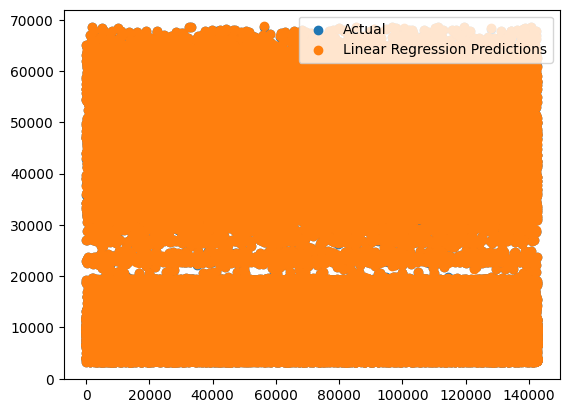

Epoch 1/100
17826/17826 [==============================] - 19s 1ms/step - loss: 132159.2344 - val_loss: 1154.4755
Epoch 2/100
17826/17826 [==============================] - 19s 1ms/step - loss: 4444.0317 - val_loss: 1021.1415
Epoch 3/100
17826/17826 [==============================] - 18s 986us/step - loss: 4205.8052 - val_loss: 1255.1719
Epoch 4/100
17826/17826 [==============================] - 19s 1ms/step - loss: 3911.9114 - val_loss: 4218.5220
Epoch 5/100
17826/17826 [==============================] - 18s 1ms/step - loss: 3629.8989 - val_loss: 2571.6621
Epoch 6/100
17826/17826 [==============================] - 18s 1ms/step - loss: 3306.7744 - val_loss: 1073.6497
Epoch 7/100
17826/17826 [==============================] - 19s 1ms/step - loss: 3201.9419 - val_loss: 1036.4723
Epoch 8/100
17826/17826 [==============================] - 19s 1ms/step - loss: 3386.8826 - val_loss: 1593.4285
Epoch 9/100
17826/17826 [==============================] - 19s 1ms/step - loss: 3182.2283 - val_loss

In [8]:
# Visualize predictions vs actual values

plt.scatter(range(len(y_test)), y_test.values, label='Actual')
plt.scatter(range(len(linear_predictions)), linear_predictions, label='Linear Regression Predictions')
plt.legend()
plt.show()


# Neural Network Model using TensorFlow/Keras
model = Sequential()
model.add(Dense(64, input_dim=features.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
X_train_np, X_test_np = X_train, X_test
y_train_np, y_test_np = y_train.to_numpy(), y_test.to_numpy()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_np, y_train_np, epochs=100, batch_size=32, validation_data=(X_test_np, y_test_np), callbacks=[early_stopping])

# Make predictions using the neural network
nn_predictions = model.predict(X_test_np)

# Evaluate the neural network model
nn_rmse = mean_squared_error(y_test_np, nn_predictions, squared=False)
print(f'Neural Network RMSE: {nn_rmse}')

In [ ]:

def simulate_trades(model_predictions, actual_prices, threshold=0.02):
    # Placeholder for simulated trades data
    trades = []

    for i in range(1, len(model_predictions)):
        # Sample condition: Buy if predicted price increase is above threshold
        if model_predictions[i] - model_predictions[i - 1] > threshold:
            entry_price = actual_prices[i - 1]
            exit_price = actual_prices[i]
            profit = exit_price - entry_price
            trades.append({'entry_price': entry_price, 'exit_price': exit_price, 'profit': profit})

    return trades

linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

In [ ]:
linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

# Calculate Gross Profit
gross_profit = sum(trade['profit'] for trade in simulated_trades if trade['profit'] > 0)

print(f'Gross Profit: {gross_profit} USDT')

In [ ]:
linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

# Calculate Gross Profit
gross_profit = sum(trade['profit'] for trade in simulated_trades if trade['profit'] > 0)

# Calculate Net Profit
net_profit = sum(trade['profit'] for trade in simulated_trades)

print(f'Gross Profit: {gross_profit} USDT')
print(f'Net Profit: {net_profit} USDT')


percentage_rmse = (linear_rmse / (df['close'].max() - df['close'].min())) * 100
print(f'Linear Regression Percentage RMSE: {percentage_rmse:.2f}%')


winning_trades = [trade for trade in simulated_trades if trade['profit'] > 0]
win_rate = len(winning_trades) / len(simulated_trades) * 100 if len(simulated_trades) > 0 else 0

# Calculate Max Drawdown
cumulative_profit = [sum(trade['profit'] for trade in simulated_trades[:i + 1]) for i in range(len(simulated_trades))]
max_drawdown = max(0, max(cumulative_profit) - max(cumulative_profit))

print(f'Win Rate: {win_rate:.2f}%')
print(f'Max Drawdown: {max_drawdown} USDT')

losing_trades = [trade for trade in simulated_trades if trade['profit'] < 0]

osing_trades = [trade for trade in simulated_trades if trade['profit'] < 0]
gross_loss = sum(trade['profit'] for trade in losing_trades)

# Calculate Average Winning Trade (in USDT)
average_winning_trade = (
    np.mean([trade['profit'] for trade in winning_trades]) if winning_trades else 0
)

print(f'Gross Loss: {gross_loss} USDT')
print(f'Average Winning Trade: {average_winning_trade} USDT')

# Calculate Average Losing Rate
average_losing_rate = (
    len(losing_trades) / len(simulated_trades) * 100 if len(simulated_trades) > 0 else 0
)

print(f'Average Losing Rate: {average_losing_rate:.2f}%')

In [ ]:
from sklearn.metrics import r2_score

linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Calculate R-squared (R2) score
r2 = r2_score(actual_prices, linear_predictions)

print(f'R-squared (R2) score: {r2:.4f}')

In [ ]:

linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

# Calculate Max Dip and Average Dip in Running Trade
cumulative_returns = np.cumsum([trade['profit'] for trade in simulated_trades])
running_max = np.maximum.accumulate(cumulative_returns)
drawdowns = running_max - cumulative_returns

max_dip = np.min(drawdowns) if len(drawdowns) > 0 else 0
average_dip = np.mean(drawdowns) if len(drawdowns) > 0 else 0

print(f'Max Dip in Running Trade: {max_dip} USDT')
print(f'Average Dip in Running Trade: {average_dip} USDT')

In [ ]:
def simulate_trades_with_timestamps(predictions, actual_prices):
    trades = []
    for i in range(1, len(predictions)):
        entry_time = i - 1
        exit_time = i
        profit = actual_prices[exit_time] - actual_prices[entry_time]

        trades.append({'entry_time': entry_time, 'exit_time': exit_time, 'profit': profit})

    return trades

In [ ]:

linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions with entry and exit timestamps
simulated_trades = simulate_trades_with_timestamps(linear_predictions, actual_prices)

# Calculate Average Holding Duration per Trade
holding_durations = [trade['exit_time'] - trade['entry_time'] for trade in simulated_trades]

average_holding_duration = np.mean(holding_durations) if holding_durations else 0

print(f'Average Holding Duration per Trade: {average_holding_duration} time units')

In [ ]:
def simulate_trades_with_timestamps(predictions, actual_prices):
    trades = []

    # Example: Using the index as a simple timestamp
    for i in range(1, len(predictions)):
        entry_time = i - 1
        exit_time = i
        profit = actual_prices[exit_time] - actual_prices[entry_time]

        trades.append({'entry_time': entry_time, 'exit_time': exit_time, 'profit': profit})

    return trades

In [ ]:
linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

# Calculate Sortino Ratio
returns = [trade['profit'] for trade in simulated_trades]
average_return = np.mean(returns)
target_return = 0.0  # You should replace this with your target return
downside_returns = [ret for ret in returns if ret < target_return]
downside_semivariance = np.mean([ret ** 2 for ret in downside_returns])

sortino_ratio = (average_return - target_return) / np.sqrt(downside_semivariance) if downside_semivariance != 0 else 0

print(f'Sortino Ratio: {sortino_ratio:.4f}')

In [ ]:
linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Calculate Buy and Hold Return of BTC
buy_and_hold_return = (
    (actual_prices[-1] - actual_prices[0]) / actual_prices[0] * 100
)

print(f'Buy and Hold Return of BTC: {buy_and_hold_return:.2f}%')

In [ ]:
linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

# Find the Largest Losing Trade (in USDT)
largest_losing_trade = min(losing_trades, key=lambda x: x['profit'])['profit'] if losing_trades else 0

print(f'Largest Losing Trade: {largest_losing_trade} USDT')

In [ ]:
linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

# Find the Largest Winning Trade (in USDT)
largest_winning_trade = max(winning_trades, key=lambda x: x['profit'])['profit'] if winning_trades else 0

print(f'Largest Winning Trade: {largest_winning_trade} USDT')

In [ ]:
linear_predictions = linear_model.predict(X_test)
actual_prices = y_test.values

# Simulate trades based on predictions
simulated_trades = simulate_trades(linear_predictions, actual_prices)

# Calculate Sharpe Ratio
returns = [trade['profit'] for trade in simulated_trades]
average_return = np.mean(returns)
risk_free_rate = 0.0  # You should replace this with the appropriate risk-free rate
standard_deviation = np.std(returns)

sharpe_ratio = (average_return - risk_free_rate) / standard_deviation if standard_deviation != 0 else 0

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')